<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Practice/Machine%20Learning/Imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 id="t1" style="margin-bottom: 18px">Imbalanced datasets</h2>


<h2 id="t4" style="margin-bottom: 18px">Resampling</h2>


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

<h2 id="t7" style="margin-bottom: 18px">Python imbalanced-learn module</h2>

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/). It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [16]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the <code>make_classification</code> method:

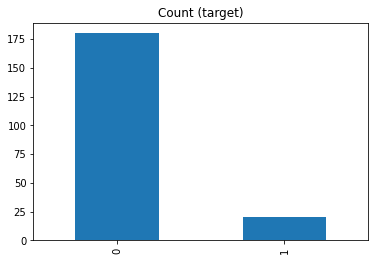

In [20]:
from sklearn.datasets import make_classification #subpackage used for creating own classifcation dataset
import pandas as pd

#generate some fake classification dataset
X, y = make_classification(
    n_classes=2, class_sep=0.75, weights=[0.9, 0.1],
    n_informative=2, n_redundant=0, flip_y=0,
    n_features=2, n_clusters_per_class=2,
    n_samples=200, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [21]:
df

,0,1,target
0,0.157423,-0.374667,0
1,-0.909752,0.037925,0
2,-0.944869,-1.136125,0
3,-0.883279,-1.362500,0
4,-0.022943,1.015924,0
...,...,...,...
195,-0.272900,0.923791,0
196,-0.880549,-0.633844,0
197,-1.186294,0.943099,0
198,-1.158688,-0.399660,0


We will also create a 2-dimensional plot function, <code>plot_2d_space</code>, to see the data distribution:

In [22]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

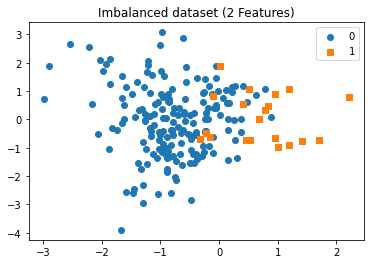

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')

<h2 id="#t72">Random under-sampling and over-sampling with imbalanced-learn</h2>

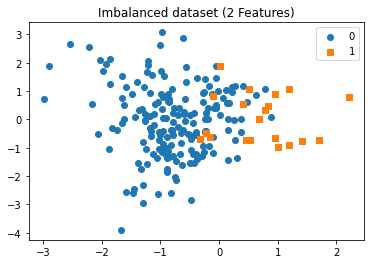

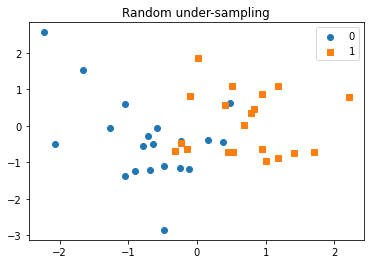

In [24]:
from imblearn.under_sampling import RandomUnderSampler #  import 

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X, y) #resampling the data 

#print('Removed indexes:', id_rus)

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

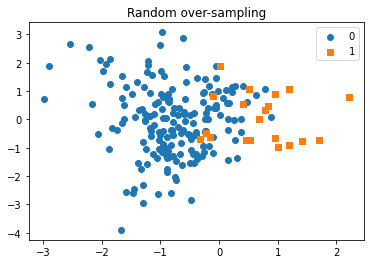

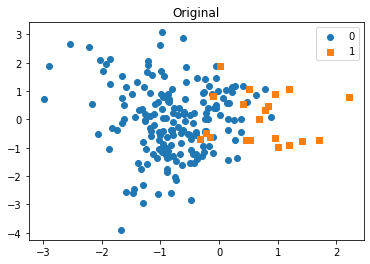

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
plot_2d_space(X, y, 'Original')

In [27]:
y_ros.sum(), y.sum(), y_rus.sum()

(180, 20, 20)

<h2 id="t9" style="margin-bottom: 18px">Under-sampling: Cluster Centroids</h2>

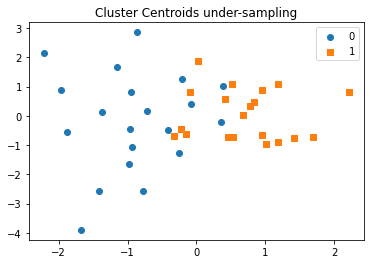

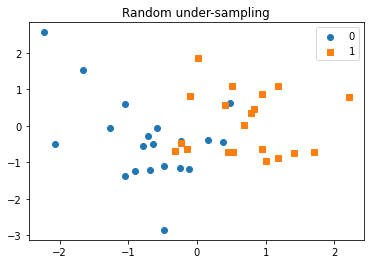

In [28]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')
#plot_2d_space(X, y, 'Original')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [29]:
y_cc.sum()/y_cc.shape[0]
#y_cc

0.5

<h2 id="t10" style="margin-bottom: 18px">Over-sampling: SMOTE</h2>

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

 ![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

We'll use <code>ratio='minority'</code> to resample the minority class.

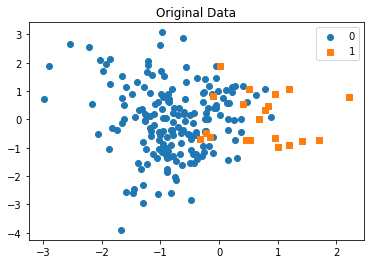

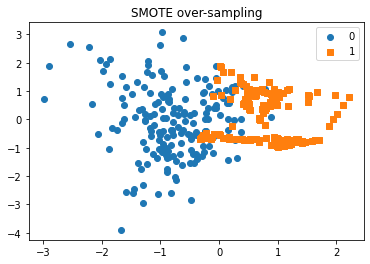

In [30]:
from imblearn.over_sampling import SMOTE

plot_2d_space(X, y, 'Original Data')

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

<h2 id="t11" style="margin-bottom: 18px">Over-sampling followed by under-sampling</h2>

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

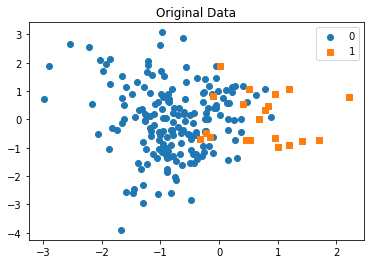

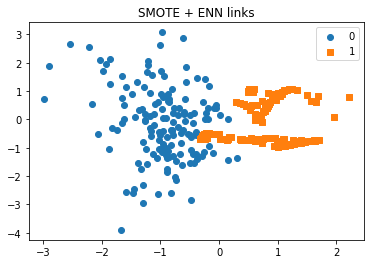

In [31]:
from imblearn.combine import SMOTEENN

plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [32]:
y_smt.shape

(302,)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X,y)


print( "AUROC on the sampled dataset : ",roc_auc_score(y, lr.predict_proba(X)[:, 1]))

AUROC on the sampled dataset :  0.9513888888888888
